In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from fgspectra import cross as fgc
from fgspectra import frequency as fgf
from fgspectra import power as fgp

from getdist import loadMCSamples, plots

In [8]:
samples_MBAC = loadMCSamples('../DR6_MBAC_planck/outputs/chains/MBAC', settings={'ignore_rows':0.3})
samples_MBAC_plik = loadMCSamples('../DR6_MBAC_planck/outputs/chains/MBAC_plik', settings={'ignore_rows':0.3})
samples_MBAC_plik_dr4 = loadMCSamples('../DR6_MBAC_planck/outputs/chains/MBAC_plik_DR4_templates', settings={'ignore_rows':0.3})
samples_MBAC_plik_dr4_choi = loadMCSamples('../DR6_MBAC_planck/outputs/chains/MBAC_plik_DR4_templates_choiprior', settings={'ignore_rows':0.3})
samples_plik = loadMCSamples('../DR6_MBAC_planck/outputs/chains/plik', settings={'ignore_rows':0.3})
samples_dunkley = loadMCSamples('../dunkley/outputs/chains_2/MBAC_dunkley_templates', settings={'ignore_rows':0.3})

samples_choi_220 = loadMCSamples('../Choi/outputs/chains/DR4_220', settings={'ignore_rows':0.3})
samples_choi_220_tsz143 = loadMCSamples('../Choi/outputs/chains/DR4_220_tsz143', settings={'ignore_rows':0.3})
samples_choi_tsz143 = loadMCSamples('../Choi/outputs/chains/DR4_tsz143', settings={'ignore_rows':0.3})


../Choi/outputs/chains/DR4_tsz143.2.txt
../Choi/outputs/chains/DR4_tsz143.3.txt
../Choi/outputs/chains/DR4_tsz143.1.txt
../Choi/outputs/chains/DR4_tsz143.4.txt
../Choi/outputs/chains/DR4_tsz143.5.txt
../Choi/outputs/chains/DR4_tsz143.6.txt
Removed 0.3 as burn in


(3, 3)

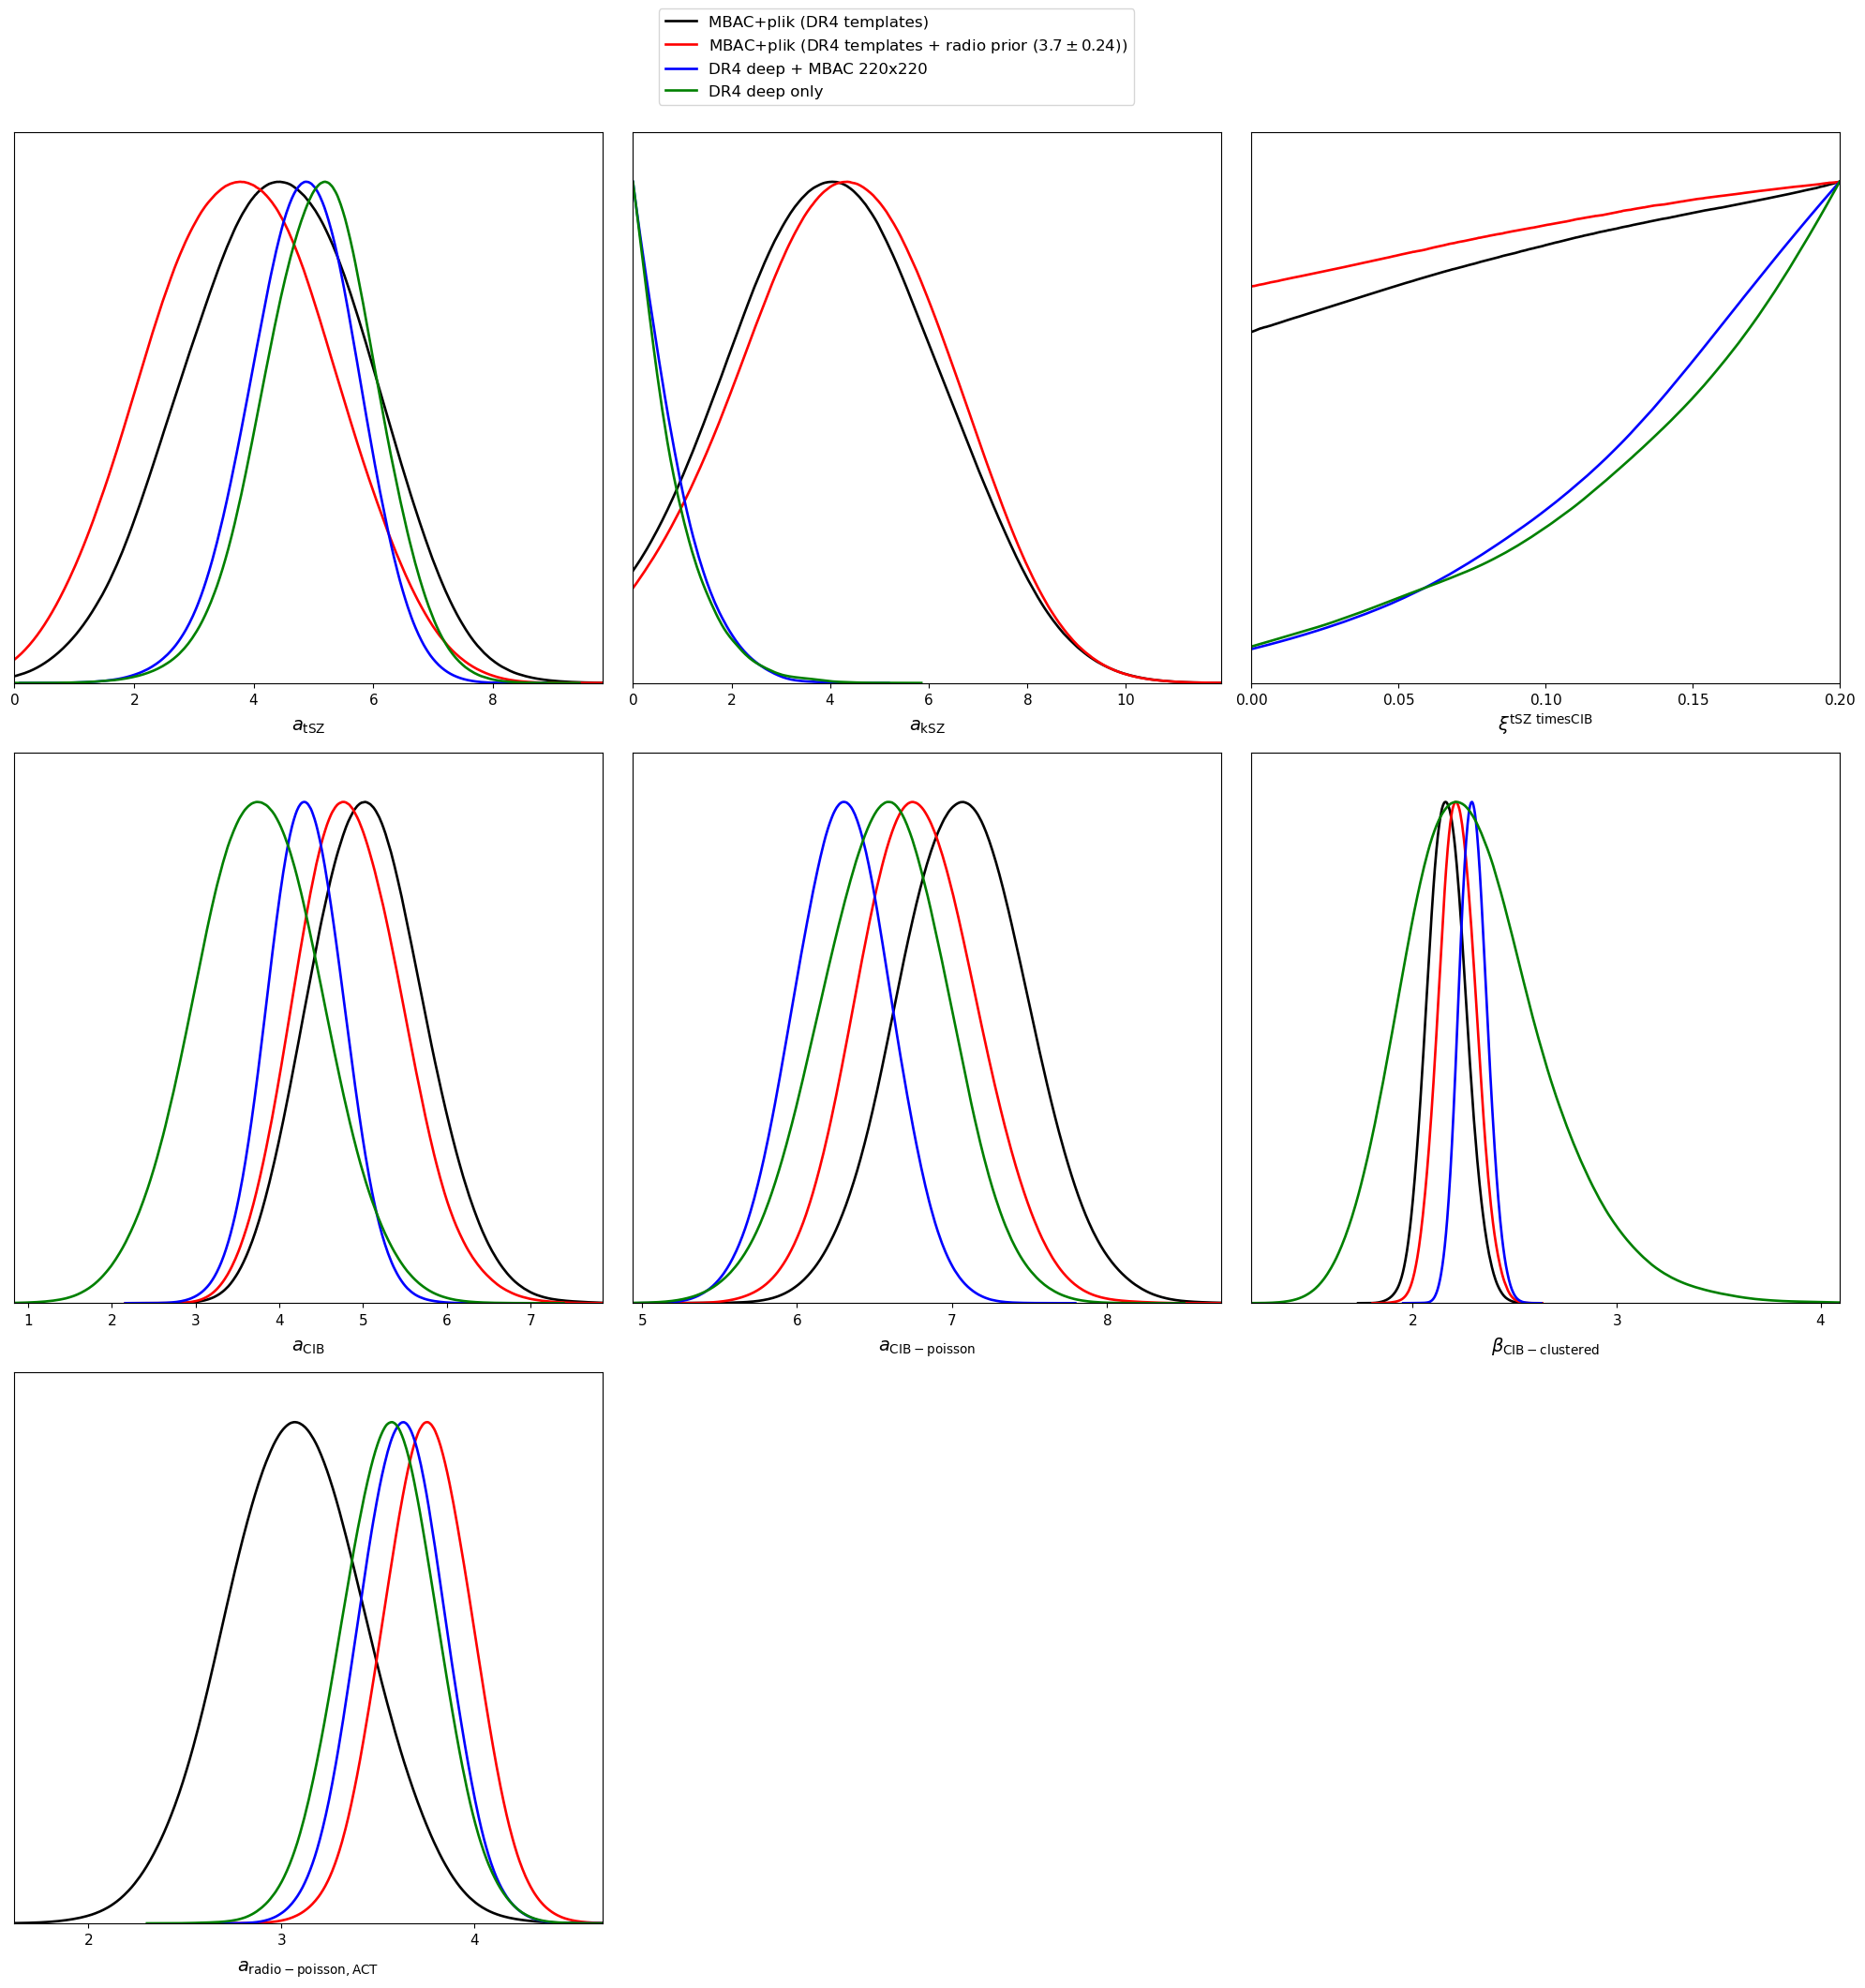

In [9]:
params_plots= ['a_tSZ','a_kSZ','xi','a_CIB', 'a_CIBp','beta_c','a_r_a']
g = plots.get_subplot_plotter(width_inch=20)
g.plots_1d([samples_MBAC_plik_dr4, samples_MBAC_plik_dr4_choi, samples_choi_220_tsz143, samples_choi_tsz143 ],
           params_plots, nx=3, legend_labels=["MBAC+plik (DR4 templates)", "MBAC+plik (DR4 templates + radio prior ($3.7\pm 0.24$))", "DR4 deep + MBAC 220x220", "DR4 deep only"])

In [10]:
print(samples_choi_220_tsz143.getTable(limit=1).tableTex())

\begin{tabular} { l  c}

 Parameter &  68\% limits\\
\hline
{\boldmath$a_\mathrm{tSZ} $} & $4.82^{+0.95}_{-0.86}      $\\

{\boldmath$a_\mathrm{kSZ} $} & $< 0.913                   $\\

{\boldmath$a_\mathrm{CIB} $} & $4.32\pm 0.45              $\\

{\boldmath$\xi^\mathrm{tSZ \ times CIB}$} & $> 0.122                   $\\

{\boldmath$\beta_\mathrm{CIB-clustered}$} & $2.298^{+0.064}_{-0.072}   $\\

{\boldmath$a^\mathrm{cirrus, ACT-DR4}$} & $2.72\pm 0.32              $\\

{\boldmath$a_\mathrm{radio-poisson, ACT}$} & $3.62\pm 0.22              $\\

{\boldmath$a_\mathrm{CIB-poisson}$} & $6.29\pm 0.32              $\\

{\boldmath$a^\mathrm{cirrus, ACT-south}$} & $0.49\pm 0.19              $\\

{\boldmath$a^\mathrm{cirrus, ACT-equa}$} & $0.80\pm 0.20              $\\

{\boldmath$y^{90}_{ACT DR4}$} & $0.9893\pm 0.0099          $\\

{\boldmath$y^{150}_{ACT DR4}$} & $0.9913\pm 0.0050          $\\

{\boldmath$y^{220}_{ACT South}$} & $1.018\pm 0.017            $\\

{\boldmath$y^{220}_{ACT Equa}$}

In [5]:
ksz = fgc.FactorizedCrossSpectrum(fgf.ConstantSED(), fgp.kSZ_planck_highL())
cibp = fgc.FactorizedCrossSpectrum(fgf.ModifiedBlackBody(), fgp.PowerLaw())
radio = fgc.FactorizedCrossSpectrum(fgf.PowerLaw(), fgp.PowerLaw())
cirrus = fgc.FactorizedCrossSpectrum(fgf.ModifiedBlackBody(), fgp.PowerLaw())

tSZ_and_CIB = fgc.CorrelatedFactorizedCrossSpectrum(
    fgf.Join(fgf.ThermalSZ(), fgf.CIB()), fgp.SZxCIB_planck_highL()
)

# for testing purposes we'll also compute the tSZ and clustered CIB alone
tsz = fgc.FactorizedCrossSpectrum(fgf.ThermalSZ(), fgp.tSZ_planck_highL())
cibc = fgc.FactorizedCrossSpectrum(fgf.CIB(), fgp.CIB_planck_highL())



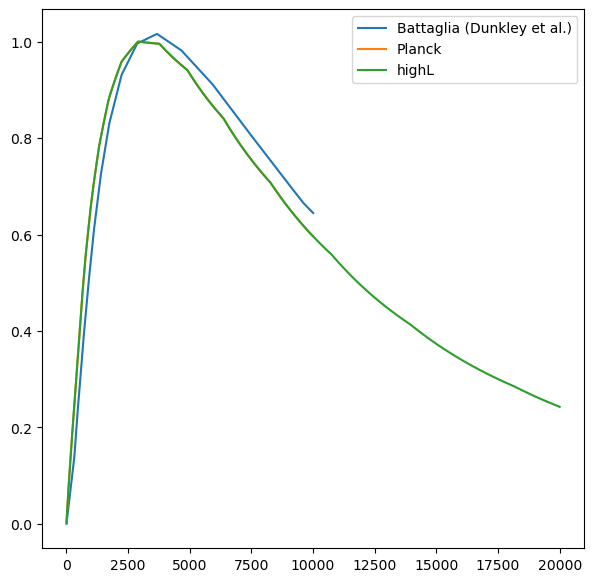

In [15]:
ell_bat, tsz_bat = np.loadtxt("../../fgspectra/fgspectra/data/cl_tsz_150_bat.dat", unpack=True)
ell_plc, tsz_plc = np.loadtxt("../../fgspectra/fgspectra/data/cl_tsz_planck.dat", unpack=True)
ell_highL, tsz_highL = np.loadtxt("../../fgspectra/fgspectra/data/cl_tsz_planck_highL.dat", unpack=True)
plt.figure(figsize=(7,7))
plt.plot(ell_bat, tsz_bat/tsz_bat[3000-2], label = "Battaglia (Dunkley et al.)")
plt.plot(ell_plc, tsz_plc/tsz_plc[3000-2], label = "Planck")
plt.plot(ell_highL, tsz_highL/tsz_highL[3000-2], label = "highL")
plt.legend()
plt.show()

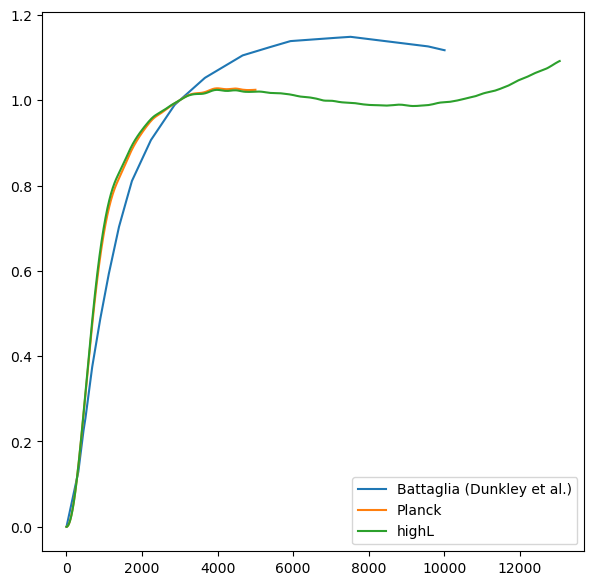

In [16]:
ell_bat, ksz_bat = np.loadtxt("../../fgspectra/fgspectra/data/cl_ksz_bat.dat", unpack=True)
ell_plc, ksz_plc = np.loadtxt("../../fgspectra/fgspectra/data/cl_ksz_planck.dat", unpack=True)
ell_highL, ksz_highL = np.loadtxt("../../fgspectra/fgspectra/data/cl_ksz_planck_highL.dat", unpack=True)
plt.figure(figsize=(7,7))
plt.plot(ell_bat, ksz_bat/ksz_bat[3000-2], label = "Battaglia (Dunkley et al.)")
plt.plot(ell_plc, ksz_plc/ksz_plc[3000-2], label = "Planck")
plt.plot(ell_highL, ksz_highL/ksz_highL[3000-2], label = "highL")
plt.legend()
plt.show()